In [ ]:
import pandas as pd


In [ ]:
train=pd.read_csv('fraudTrain.csv')
test=pd.read_csv("fraudTest.csv")

In [ ]:
train.shape

(11706, 23)

In [ ]:
test.shape

(11697, 23)

In [ ]:
frames = [train,test]

In [ ]:
df = pd.concat(frames)

In [ ]:
df.shape

(23403, 23)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
df[cols] = encoder.fit_transform(df[cols])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

index                    0
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df['is_fraud'].value_counts()

0.0    23324
1.0       77
Name: is_fraud, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['is_fraud'],axis=1)
y=df['is_fraud']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

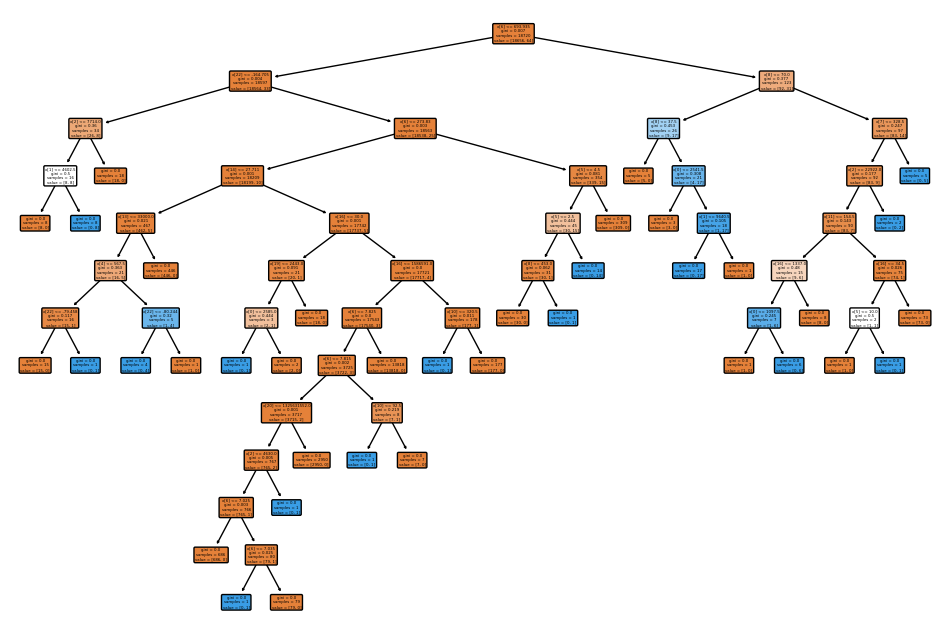

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming x and y are your feature matrix and target variable
# x_train, x_test, y_train, y_test are obtained using train_test_split

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=100)

# Fit the model on the training data
dt_classifier.fit(x_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=None, class_names=None, rounded=True)
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming x and y are your feature matrix and target variable
# x_train, x_test, y_train, y_test are obtained using train_test_split

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=100)

# Fit the model on the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9989318521683401


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
pred_train = model.predict(x_train)
pred_test  = model.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.9965811965811966
Testing  Accuracy :  0.9972228156376842
